<a href="https://colab.research.google.com/github/Disastrous10/Cars_Or_Planes/blob/main/Planes_or_cars_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from PIL import Image

# Mount drive (import dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
img_height = 180
img_width = 180
batch_size = 100

In [ ]:
ds_train = tf.keras.utils.image_dataset_from_directory(
  'gdrive/MyDrive/Advanced coding/Datasets',
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 80 files for training.


In [ ]:
ds_validation = tf.keras.utils.image_dataset_from_directory(
  'gdrive/MyDrive/Advanced coding/Datasets',
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [ ]:
os.listdir('gdrive/MyDrive/Advanced coding/Datasets')

['Cars', 'Planes']

# Display dataset

In [ ]:
class_names = ds_train.class_names
print(class_names)

['Cars', 'Planes']


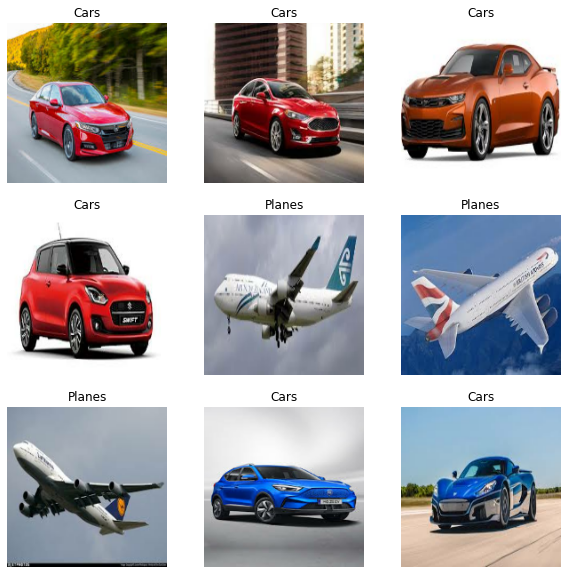

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Preprocessing

In [ ]:
"""
AUTOTUNE = tf.data.AUTOTUNE


resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

def prepare_images(ds, shuffle=False,):
  
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)
  
  ds = ds.batch(batch_size)

  return ds.prefetch(buffer_size=AUTOTUNE)
"""

# Model code

In [ ]:
def create_cnn_model():
  model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(img_height, img_width, 3)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
                tf.keras.layers.MaxPool2D(2, 2),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(2, activation='softmax')
])
  model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer='adam'
                      )
  return model

In [ ]:
model = create_cnn_model()

ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights='True'
)
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 179, 179, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 88, 88, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 43, 43, 64)        8256      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 21, 64)     

In [ ]:
model.fit(ds_train,
          epochs=15,
          validation_data=ds_validation,
          callbacks=[ES])

Epoch 1/15
1/1 [==============================] - 1s 834ms/step - loss: 9.3983 - accuracy: 0.4000 - val_loss: 827.9147 - val_accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 270ms/step - loss: 610.3040 - accuracy: 0.5250 - val_loss: 201.5579 - val_accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 271ms/step - loss: 146.1606 - accuracy: 0.5250 - val_loss: 69.9206 - val_accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 260ms/step - loss: 85.1696 - accuracy: 0.4750 - val_loss: 69.6628 - val_accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 264ms/step - loss: 86.5559 - accuracy: 0.4750 - val_loss: 42.0751 - val_accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 255ms/step - loss: 50.9232 - accuracy: 0.4750 - val_loss: 7.8082 - val_accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 240ms/step - loss: 7.1648 - accuracy: 0.5375 - val_loss: 20.6768 - val_accuracy: 0.4000
Epoch

# Inference

In [ ]:
def inference_function(image_path):
  """
  image_path (str): path of the image file

  returns index, probability
  img (PIL.Image.Image): the image from the image_path
  index (int): the class the image belongs to
  probability (float): the probability for that class
  """

  img = tf.keras.utils.load_img(
      image_path, target_size=(img_height, img_width)
  )

  img_array = tf.keras.utils.img_to_array(
    img, data_format=None, dtype=None
  )
  img_array = img_array*(1./255)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)

  pred = np.squeeze(predictions)
  index = np.argmax(pred)

  probability = pred[1]

  return img, index, probability

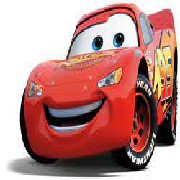

Planes 0.5039229


In [ ]:
img, class_index, class_probability = inference_function("pl.jpg")

class_name = class_names[class_index]
display(img)
print(class_name, class_probability)

# Transfer Learning

In [ ]:
from keras import layers
from tensorflow import keras
from keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE


resize_and_rescale = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

def prepare_images(ds, shuffle=False,):
  
  #ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              #num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)
  
  #ds = ds.batch(batch_size)

  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
ds_train = prepare_images(ds_train, shuffle=True)
ds_validation = prepare_images(ds_validation)

In [ ]:
vg16 = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    classes=2,
    classifier_activation='softmax'
)

In [ ]:
vg16.summary()

In [ ]:
for i in vg16.layers:
    i.trainable = False

model = tf.keras.models.Sequential([
    vg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights='True'
)

epochs = 10
history = model.fit(
  ds_train,
  validation_data=ds_validation,
  epochs=epochs,
  callbacks=[ES])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 7s 7s/step - loss: 1.5287 - accuracy: 0.6375 - val_loss: 1.3904 - val_accuracy: 0.6500
Epoch 2/10
1/1 [==============================] - 1s 535ms/step - loss: 0.5345 - accuracy: 0.7875 - val_loss: 0.6158 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 1s 522ms/step - loss: 0.3036 - accuracy: 0.8750 - val_loss: 0.2789 - val_accuracy: 0.9000
Epoch 4/10
1/1 [==============================] - 1s 544ms/step - loss: 0.1547 - accuracy: 0.9375 - val_loss: 0.1580 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 1s 530ms/step - loss: 0.0689 - accuracy: 0.9750 - val_loss: 0.1064 - val_accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 1s 523ms/step - loss: 0.0285 - accuracy: 0.9875 - val_loss: 0.0756 - val_accuracy: 0.9500
Epoch 7/10
1/1 [==============================] - 1s 533ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9500
Epoch 8/10
1/1 [==================